## Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

#inline visualization
%matplotlib inline

In [41]:
#import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
data= pd.read_csv('Fraud_check (1).csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [48]:
data.shape

(600, 6)

In [9]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


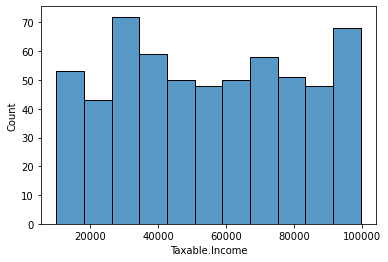

In [11]:

sns.histplot(data['Taxable.Income']);

In [12]:
data = data.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Work.Experience':'work_exp',})
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [13]:
data['is_Check']= ['Risky' if x <= 30000 else 'Good' for x in data['taxable_income']]

In [14]:
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [17]:
lable_encoder = preprocessing.LabelEncoder()
data['Risky'] = lable_encoder.fit_transform(data['is_Check'])

In [18]:
data['Mar_status'] = lable_encoder.fit_transform(data.marital_status)

In [19]:
data['Graduate'] = lable_encoder.fit_transform(data.Undergrad)

In [20]:
data['urban'] = lable_encoder.fit_transform(data.Urban)

In [21]:
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check,Risky,Mar_status,Graduate,urban
0,NO,Single,68833,50047,10,YES,Good,0,2,0,1
1,YES,Divorced,33700,134075,18,YES,Good,0,0,1,1
2,NO,Married,36925,160205,30,YES,Good,0,1,0,1
3,YES,Single,50190,193264,15,YES,Good,0,2,1,1
4,NO,Married,81002,27533,28,NO,Good,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good,0,0,1,1
596,YES,Divorced,69967,55369,2,YES,Good,0,0,1,1
597,NO,Divorced,47334,154058,0,YES,Good,0,0,0,1
598,YES,Married,98592,180083,17,NO,Good,0,1,1,0


In [22]:
data1 = data.drop(['Undergrad','marital_status','Urban','is_Check','taxable_income'],axis=1)

In [23]:
data1=data[['city_population','work_exp',"Mar_status",'Graduate','urban','Risky']]
data1

,city_population,work_exp,Mar_status,Graduate,urban,Risky
0,50047,10,2,0,1,0
1,134075,18,0,1,1,0
2,160205,30,1,0,1,0
3,193264,15,2,1,1,0
4,27533,28,1,0,0,0
...,...,...,...,...,...,...
595,39492,7,0,1,1,0
596,55369,2,0,1,1,0
597,154058,0,0,0,1,0
598,180083,17,1,1,0,0


In [24]:
X = data1.iloc[:,0:5]
Y = data1.iloc[:,5]

In [25]:
X

,city_population,work_exp,Mar_status,Graduate,urban
0,50047,10,2,0,1
1,134075,18,0,1,1
2,160205,30,1,0,1
3,193264,15,2,1,1
4,27533,28,1,0,0
...,...,...,...,...,...
595,39492,7,0,1,1
596,55369,2,0,1,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [26]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risky, Length: 600, dtype: int32

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=5,oob_score=True,n_estimators=60,criterion="entropy")

In [28]:
rf.fit(X,Y) 
rf.estimators_  
rf.classes_
rf.n_classes_  
rf.n_features_  

rf.n_outputs_ 

rf.oob_score_ 
rf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
rf.oob_score_ 

0.7266666666666667

In [30]:
rf.n_features_ 

5

In [32]:
data1['rf_pred'] = rf.predict(X)

In [33]:
cols = ['rf_pred','Risky']

In [34]:
data1[cols].head()

,rf_pred,Risky
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [35]:
data1["Risky"]

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risky, Length: 600, dtype: int32

In [44]:
pd.crosstab(data1["Risky"],data1["rf_pred"])


rf_pred,0,1
Risky,,
0,476,0
1,1,123


In [45]:
print("Accuracy",(476+123)/(476+123+0+1)*100)


Accuracy 99.83333333333333
